# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data

In [44]:
london_bikes = pd.read_csv("./data/london_bikes.csv")
london_bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [56]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
energy = pd.read_csv("./data/US_energy_sector.csv")
energy.head()

,Unnamed: 0,Month,All,Coal,Natural gas,Nuclear,Hydroelectric,Wind,Solar
0,0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


# Scatter plot

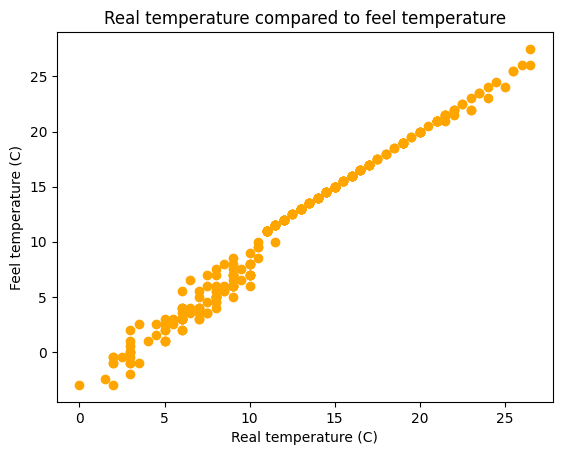

In [54]:
subset = london_bikes.sample(300)

plt.scatter(
    subset["t1"],
    subset["t2"],
    color = "orange"
)
plt.title("Real temperature compared to feel temperature")
plt.xlabel("Real temperature (C)")
plt.ylabel("Feel temperature (C)")
plt.show()

# Pie vs. Bar plot comparison

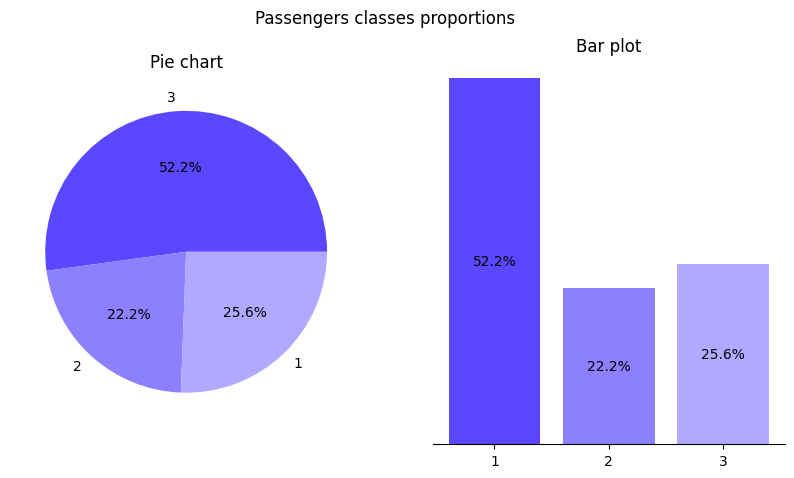

In [55]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

percentages = [len(titanic[titanic["Pclass"] == pc])/len(titanic) for pc in titanic["Pclass"].unique()]

ax[0].pie(
    percentages,
    labels = titanic["Pclass"].unique(),
    autopct = "%1.1f%%",
    colors = ["#5a47ff", "#8d80ff", "#b1a8ff"]
)
ax[0].set_title("Pie chart")

ax[1].bar(
    np.arange(3),
    percentages,
    color = ["#5a47ff", "#8d80ff", "#b1a8ff"]
)
for i, perc in enumerate(percentages):
    ax[1].text(i, perc/2, f"{perc*100:.1f}%", ha="center", va="center")
ax[1].set_title("Bar plot")
ax[1].spines["top"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(3), np.arange(1, 4))

fig.suptitle("Passengers classes proportions")
plt.show()

# Line/Area plot

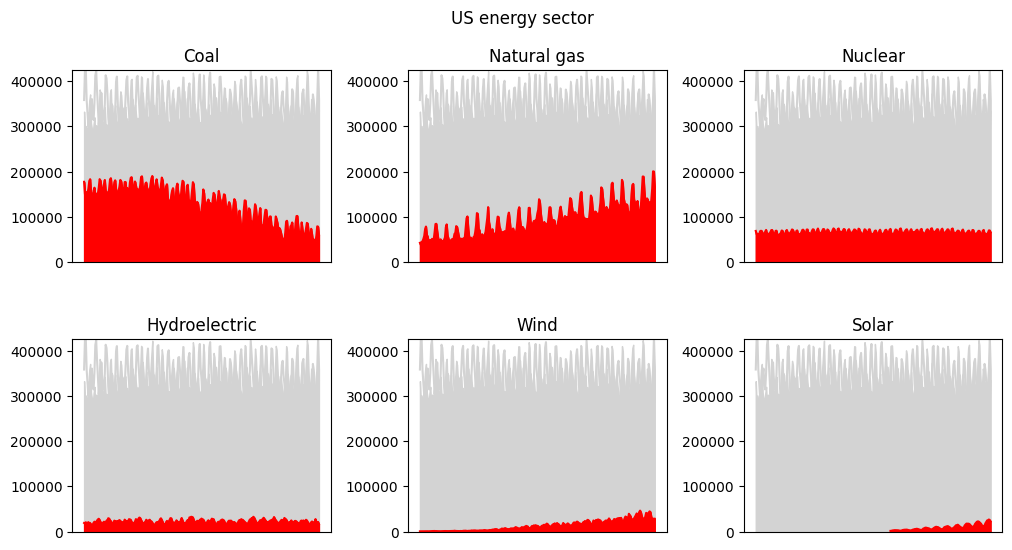

In [123]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

columns = energy.columns[2:]
all_fules = list(reversed(energy["All"]))

for r in range(2):
    for c in range(3):
        column_name = columns[r*3 + c]
        ax[r][c].set_title(column_name)
        ax[r][c].plot(energy["All"], color="lightgray")
        ax[r][c].fill_between(np.arange(len(energy)), np.zeros(len(energy)), all_fules, color="lightgray")
        ax[r][c].set_ylim(0, max(all_fules))
        ax[r][c].plot(list(reversed(energy[column_name])), color="red")
        ax[r][c].fill_between(np.arange(len(energy)), np.zeros(len(energy)), list(reversed(energy[column_name])), color="red")
        ax[r][c].set_xticks([])

fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle("US energy sector")
plt.show()